# Breast Cancer Classification

Classify whether the cancer is benign or malignant

Dataset source : <https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data>

## Problem Preparation

Import libraries

In [1]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, auc, classification_report, confusion_matrix, roc_curve, ConfusionMatrixDisplay, PrecisionRecallDisplay
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

Load the dataset

In [2]:
df = pd.read_csv("dataset/wdbc.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Data Summarization dan Visualization

Shows the summary of the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

We can see that all columns are numeric except the diagnosis, so the next step is we going to encode this column to numeric

Encode the diagnosis column using Label Encoder

In [4]:
encoder = LabelEncoder()

df['diagnosis'] = encoder.fit_transform(df['diagnosis'])
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,1,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,1,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


Drop the id column because its doesn't provide any useful information

In [5]:
df = df.drop(["id"], axis=1)

Generate descriptive statistics of the dataset

In [6]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Plot a histogram for each attribute

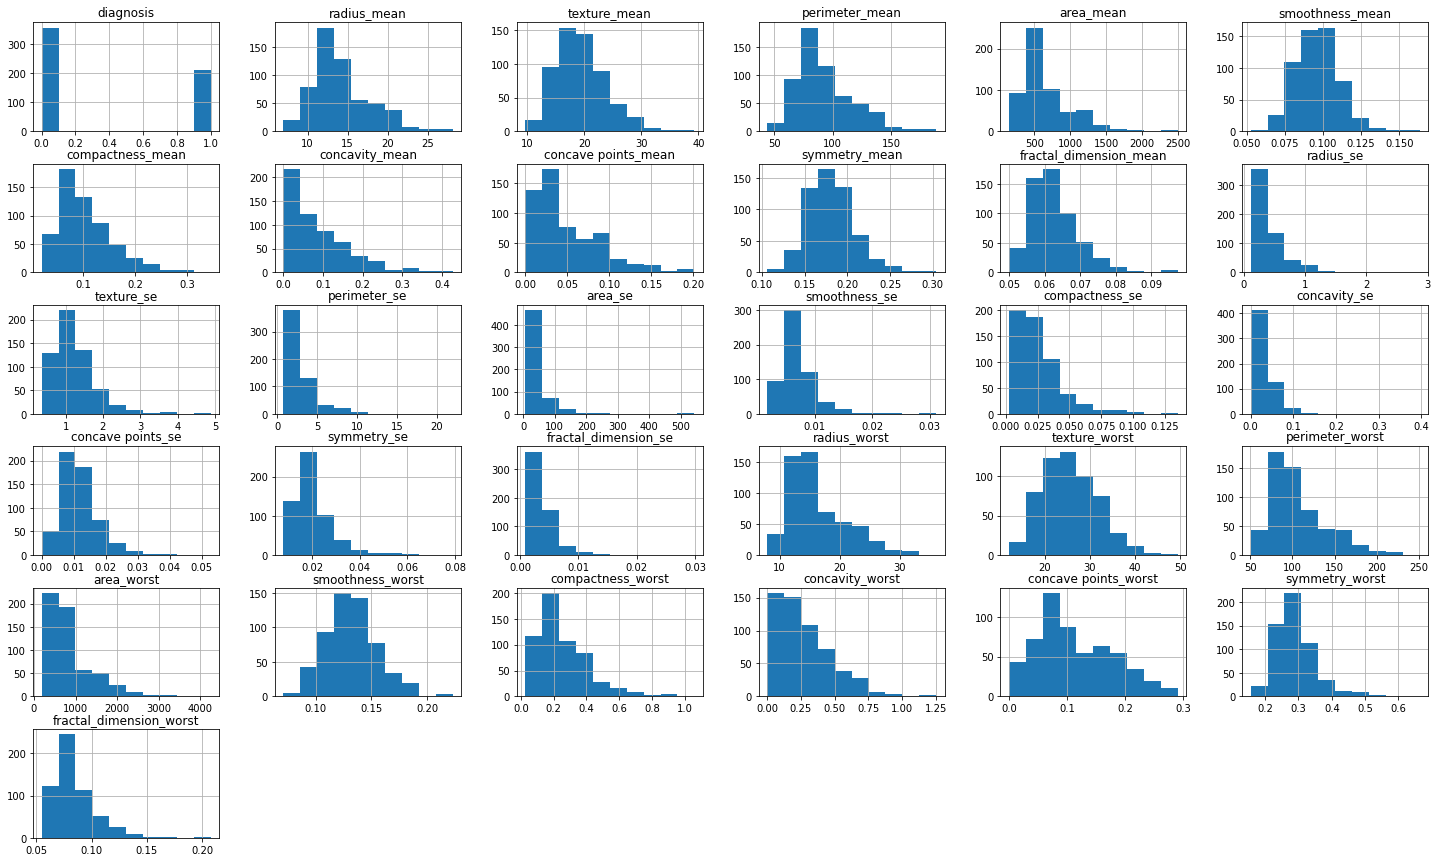

In [7]:
df.hist(figsize=(25, 15))
plt.show()

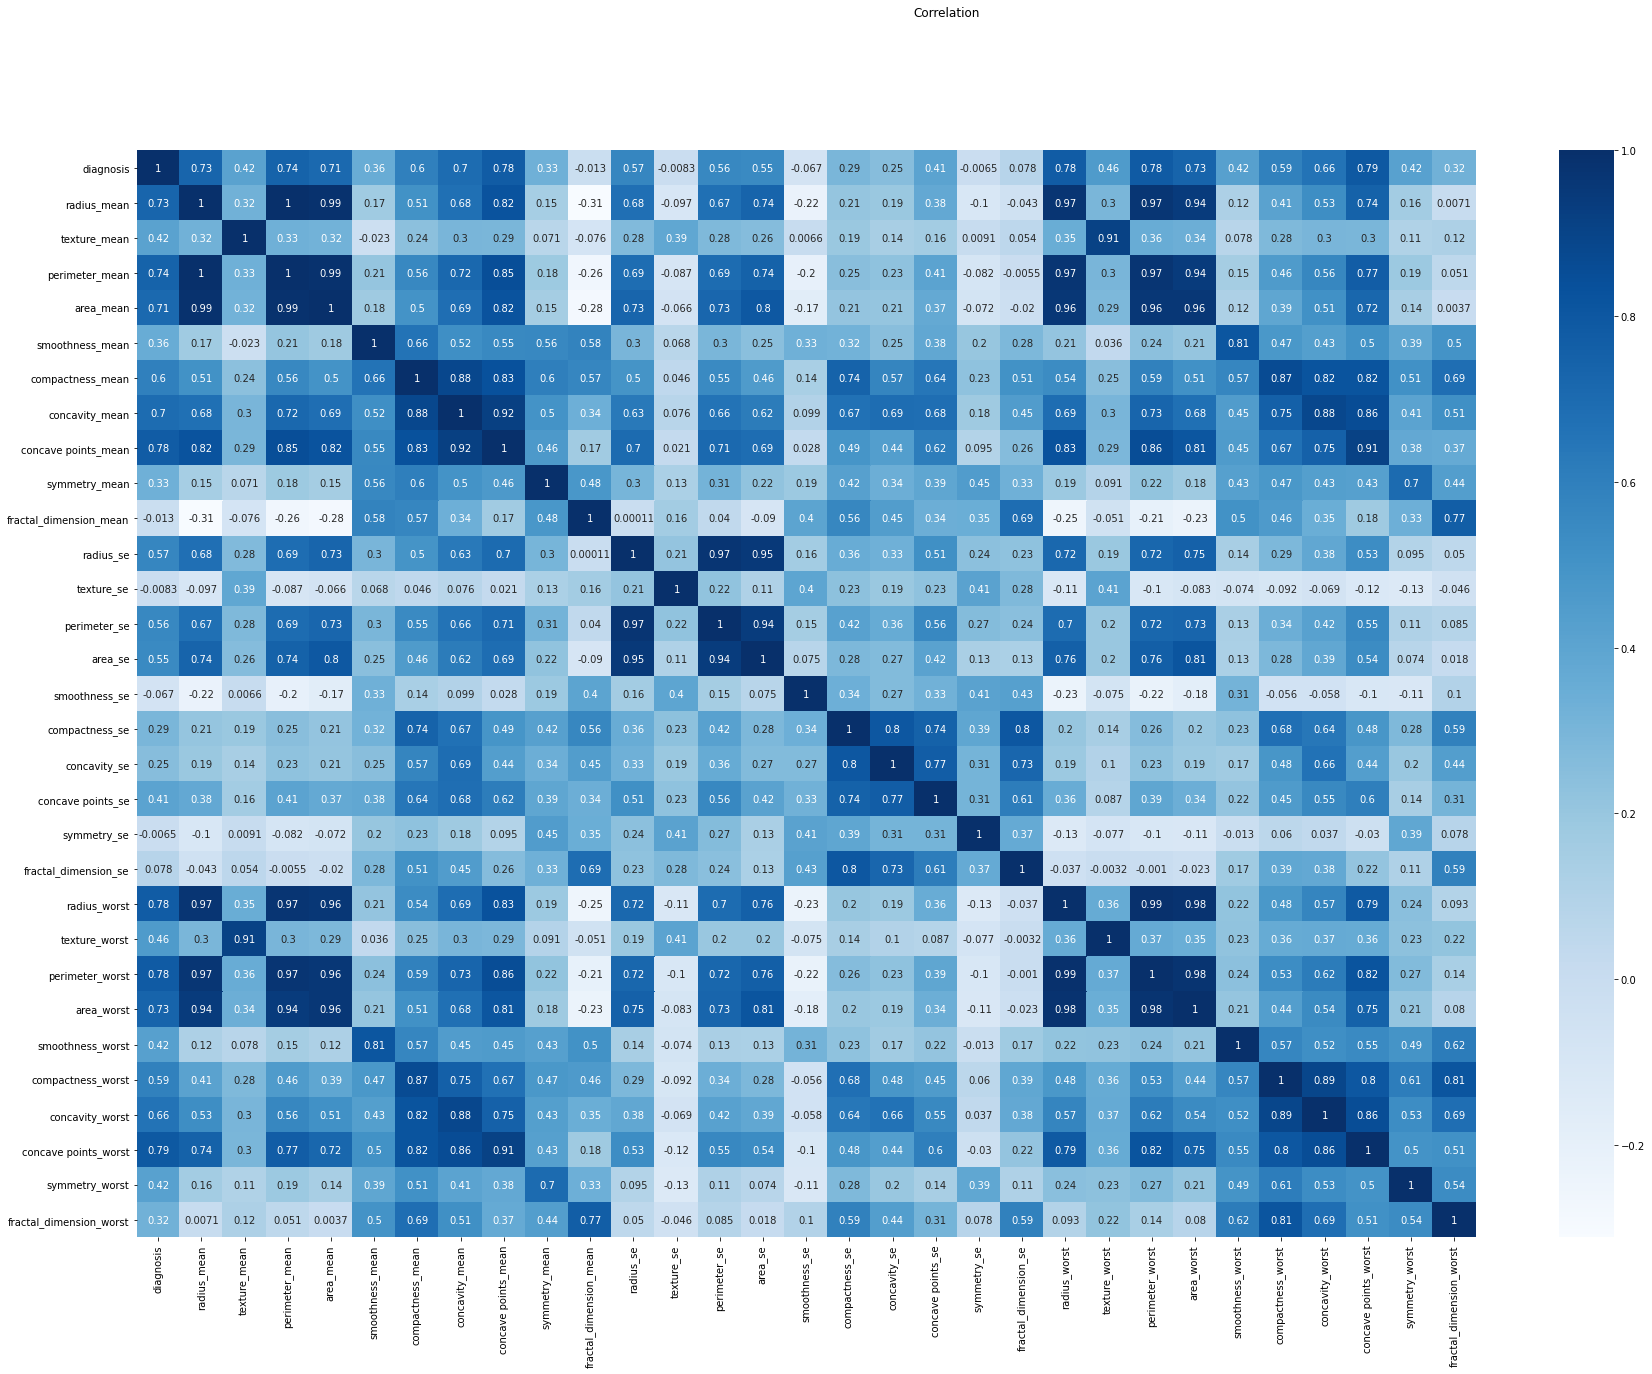

In [8]:
plt.figure(figsize=[30, 20])
plt.suptitle("Correlation")
sns.heatmap(df.corr(), annot=True, cmap="Blues");

## Data Preparation

Set the features and target column

In [9]:
X = df.drop(["diagnosis"], axis=1)
y = pd.DataFrame(df["diagnosis"].copy())

Split the training and testing set

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Scale the data using Standard Scaler

In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

Feature reduction using PCA

In [12]:
pca = PCA(n_components=2)

X_train_pca = pca.fit_transform(X_train_scaled)
X_train_pca = pd.DataFrame(X_train_pca, columns = ["PC-1", "PC-2"])

In [13]:
y_train_label_inversed = encoder.inverse_transform(y_train.values.ravel())
y_train_pca = pd.DataFrame(y_train_label_inversed, columns=["diagnosis"]).merge(X_train_pca, how="inner", left_index=True, right_index=True)

Shows the percentage of variance explained by each of the components

In [14]:
print(pca.explained_variance_ratio_)

[0.4316748  0.19845652]


We can visualize the data that has been dimensionally reduced by PCA

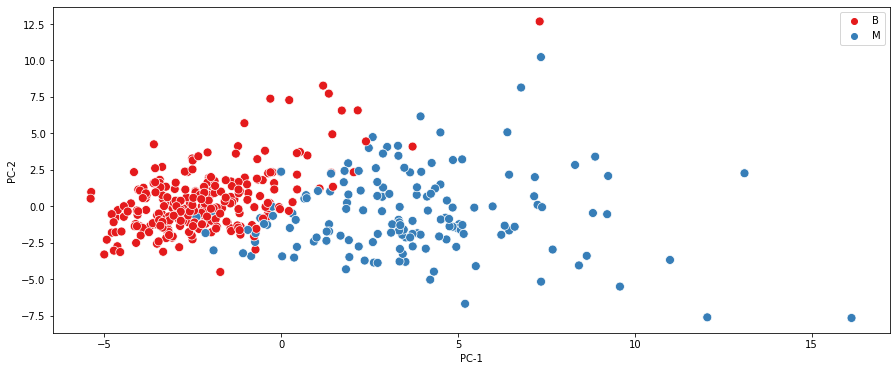

In [15]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.scatterplot(x="PC-1", y="PC-2", data=y_train_pca, s=80, hue="diagnosis", palette="Set1", ax=ax)
ax.legend(loc='upper right')
plt.show()

## Model Training

Model shortlisting by creating a multiple model

In [16]:
models = [
    ("Logistic Regression", LogisticRegression()),
    ("KNN", KNeighborsClassifier()),
    ("Naive Bayesian", GaussianNB()),
    ("Support Vector Machine", SVC()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier())]

names = []
cv_mean = []
cv_std = []
scoring = "accuracy"
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_train_pca, y_train.values.ravel(), cv=kfold, scoring=scoring)
    names.append(name)
    cv_mean.append(cv_results.mean())
    cv_std.append(cv_results.std())

model_results = pd.DataFrame(list(zip(names, cv_mean, cv_std)), columns=['model', 'accuracy', 'stdev'])
model_results.round(3)

,model,accuracy,stdev
0,Logistic Regression,0.945,0.022
1,KNN,0.922,0.029
2,Naive Bayesian,0.904,0.027
3,Support Vector Machine,0.932,0.023
4,Decision Tree,0.902,0.028
5,Random Forest,0.920,0.015


In [17]:
clf_method = LogisticRegression()

Create a pipeline

In [18]:
clf = Pipeline([
    ("scaler", scaler),
    ("pca", pca),
    ("clf_method", clf_method)
])

clf.fit(X_train, y_train.values.ravel())

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=2)),
                ('clf_method', LogisticRegression())])

Evaluate the accuracy of training set

In [19]:
train_pred = clf.predict(X_train)
print(f"Model accuracy on the training set : {accuracy_score(y_train, train_pred):.3f}")

Model accuracy on the training set : 0.947


In [20]:
print(classification_report(y_train, train_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       249
           1       0.94      0.92      0.93       149

    accuracy                           0.95       398
   macro avg       0.95      0.94      0.94       398
weighted avg       0.95      0.95      0.95       398



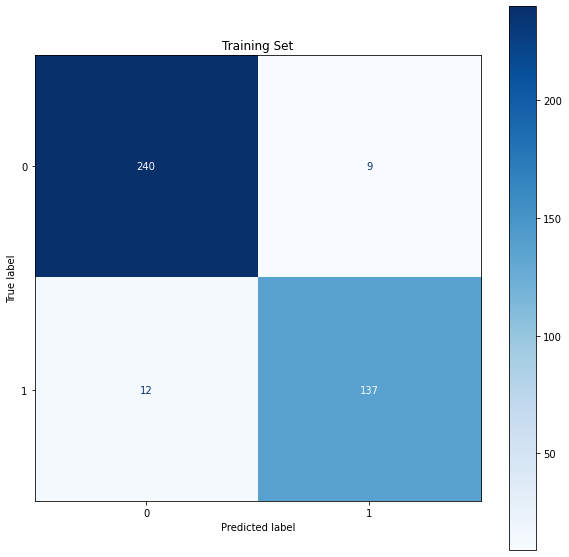

In [21]:
conf_mat_train = ConfusionMatrixDisplay(confusion_matrix(y_train, train_pred))

fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Training Set')
conf_mat_train.plot(cmap=plt.cm.Blues, ax=ax);

Plot the decision boundaries

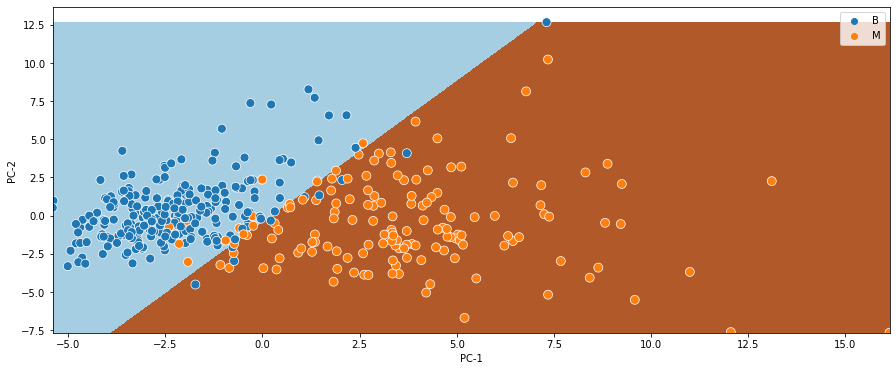

In [22]:
x_min, x_max = y_train_pca["PC-1"].min(), y_train_pca["PC-1"].max()
y_min, y_max = y_train_pca["PC-2"].min(), y_train_pca["PC-2"].max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, .01), np.arange(y_min, y_max, .01))
Z = clf_method.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

fig, ax = plt.subplots(figsize=(15, 6))
plt.pcolormesh(xx, yy, Z, cmap="Paired", shading="auto")
sns.scatterplot(x="PC-1", y="PC-2", data=y_train_pca, s=80, hue="diagnosis", ax=ax)
ax.legend(loc='upper right')
plt.show()

## Model Evaluation

Evaluate the accuracy of testing set

In [23]:
test_pred = clf.predict(X_test)
print(f"Model accuracy on the testing set : {accuracy_score(y_test, test_pred):.3f}")

Model accuracy on the testing set : 0.977


In [24]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       108
           1       0.97      0.97      0.97        63

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



Plot the precision-recall curve

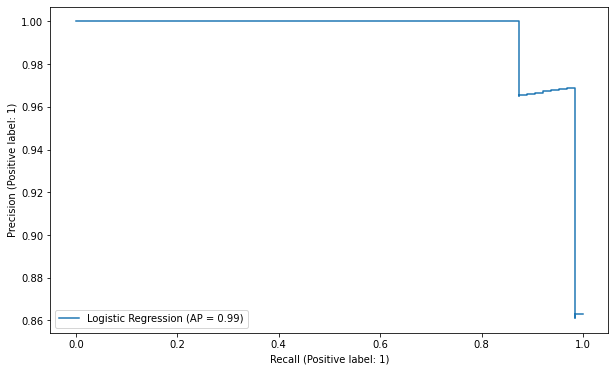

In [25]:
fig, ax = plt.subplots(figsize=(10, 6))
display = PrecisionRecallDisplay.from_estimator(
    clf, X_test, y_test, name="Logistic Regression", ax=ax
)


Plot the ROC curve of the positive class

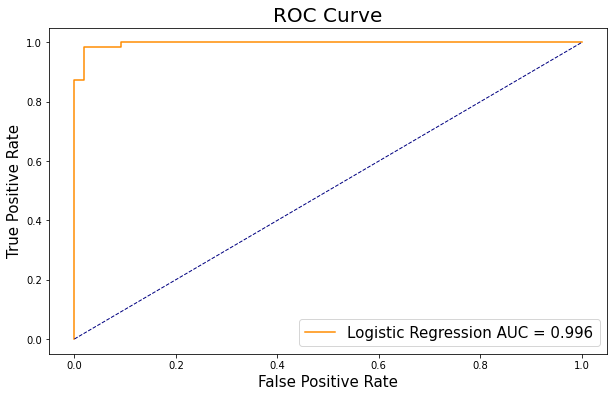

In [26]:
clf_proba = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, clf_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f"Logistic Regression AUC = {roc_auc:.3f}", color="darkorange")
plt.plot([0, 1], [0, 1], color="navy", lw=1, linestyle="--")
plt.title("ROC Curve", fontsize=20)
plt.xlabel("False Positive Rate", fontsize=15)
plt.ylabel("True Positive Rate", fontsize=15)
plt.legend(fontsize=15)
plt.show()

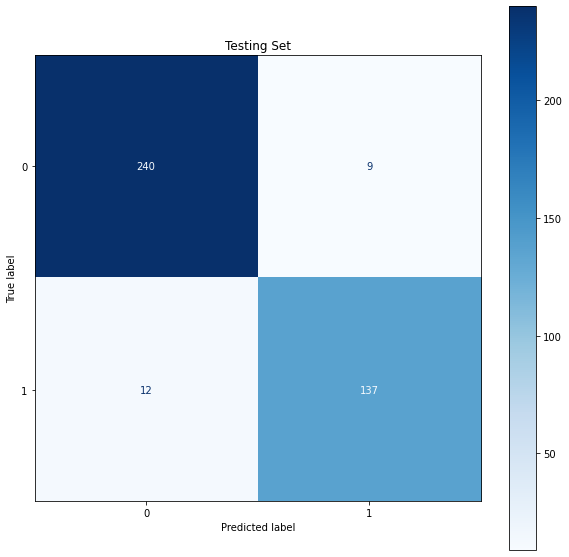

In [27]:
conf_mat_test = ConfusionMatrixDisplay(confusion_matrix(y_test, test_pred))

fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Testing Set')
conf_mat_train.plot(cmap=plt.cm.Blues, ax=ax);

In [28]:
filename = "model/breast_cancer_classification_model.sav"
joblib.dump(clf, filename)

['model/breast_cancer_classification_model.sav']

## Conclusion

In this project we have succeeded in building a model to classify breast cancer. PCA is used as a feature reduction method and Logistic Regression as a classifier. We set two components to keep and this components is used as the feature to train the model. The model succeeded in obtaining high accuracy of 0.947 and 0.991 on the training set and testing set, respectively.